In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('full_data.xlsx')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#Cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#model
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#evaluate
from sklearn.metrics import (
    accuracy_score,
    r2_score,
    mean_squared_error,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay)


In [3]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
print('No. of rows =',df.shape[0])
print('No. of columns =',df.shape[1])
print('No. of duplicates =', df.duplicated().sum())
print('')
df.info()

No. of rows = 129880
No. of columns = 25
No. of duplicates = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             12988

<ipython-input-5-363c36fb6229>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data = df, x = 'Age', hue = 'satisfaction' , shade = True)


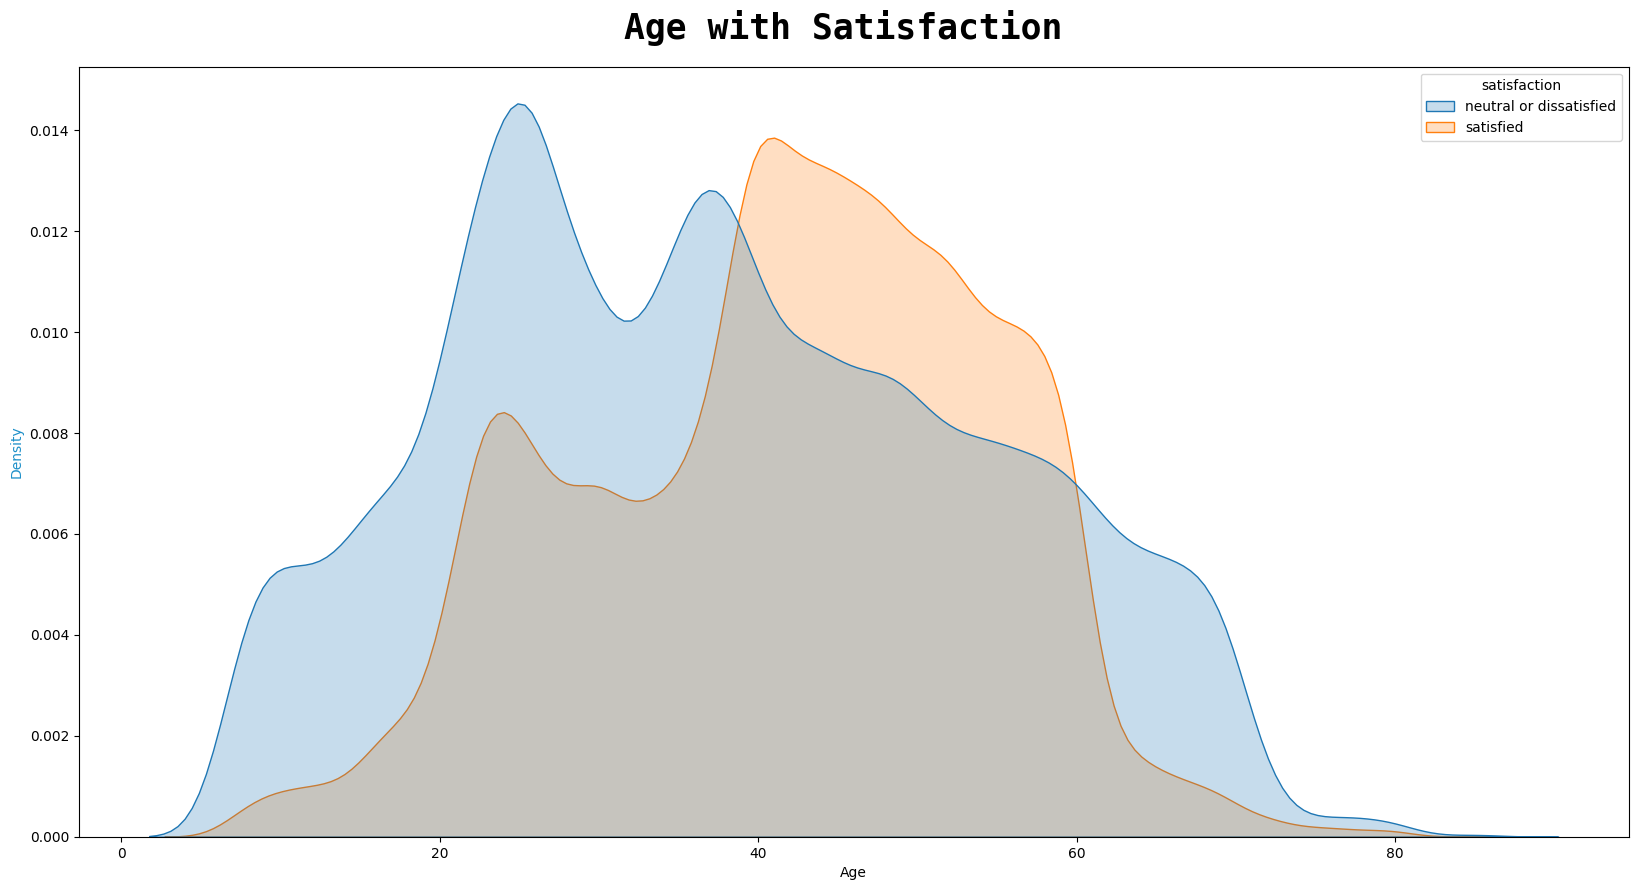

In [5]:
#Satisfaction by age
plt.figure(figsize = (20,10))

g = sns.kdeplot(data = df, x = 'Age', hue = 'satisfaction' , shade = True)

plt.rc('ytick', labelsize=10)
g.set_title("Age with Satisfaction ", size = 25, weight = "bold", fontname = "monospace", pad = 20)
plt.ylabel('Density' , size=10, color='#1e90c9')

plt.show()

- Ở đây cho thấy độ tuổi phổ biến nhất là ở độ tuổi 20 và 40 nên việc biết mục
đích đi du lịch của họ có thể cho chúng ta biết thêm về ý kiến của họ
- Chúng ta có thể thấy những người Hài lòng nằm trong khoảng [40-56] tuổi & Không hài lòng nằm trong khoảng [20-40] tuổi.

Gender  satisfaction           
Female  neutral or dissatisfied    0.571025
        satisfied                  0.428975
Male    neutral or dissatisfied    0.559885
        satisfied                  0.440115
Name: proportion, dtype: float64

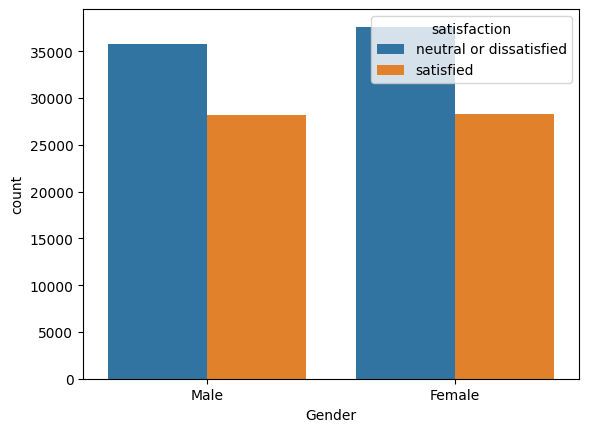

In [6]:
sns.countplot(data=df,x='Gender',hue='satisfaction')
df.groupby(['Gender'])[['satisfaction']].value_counts(normalize=True)

Tỷ lệ hài lòng của khách hàng nam khoảng 44% tương đương với tỷ lệ hài lòng của khách hàng nữ 43%. Có thể thấy mức độ không hài lòng cao hơn tỉ lệ hài lòng của cả nam và nữ

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    0.521885
                   satisfied                  0.478115
disloyal Customer  neutral or dissatisfied    0.760303
                   satisfied                  0.239697
Name: proportion, dtype: float64

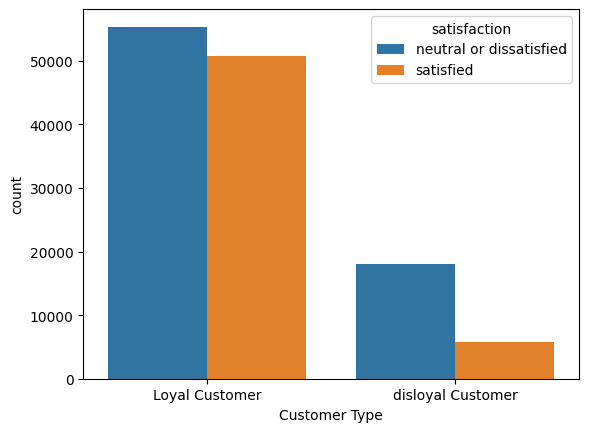

In [7]:
sns.countplot(data=df,x='Customer Type',hue='satisfaction')
df.groupby(['Customer Type'])[['satisfaction']].value_counts(normalize=True)

- Số lượng hành khách 'returning' chiếm tỷ lệ hài lòng cao khoảng 48%. Những hành khách 'First_time' có tỷ lệ hài lòng khá thấp chỉ khoảng 24%. Và cả 2 nhóm khách hàng đều có số lượng đánh giá không hài lòng cao hơn.

Type of Travel   satisfaction           
Business travel  satisfied                  0.583724
                 neutral or dissatisfied    0.416276
Personal Travel  neutral or dissatisfied    0.898674
                 satisfied                  0.101326
Name: proportion, dtype: float64

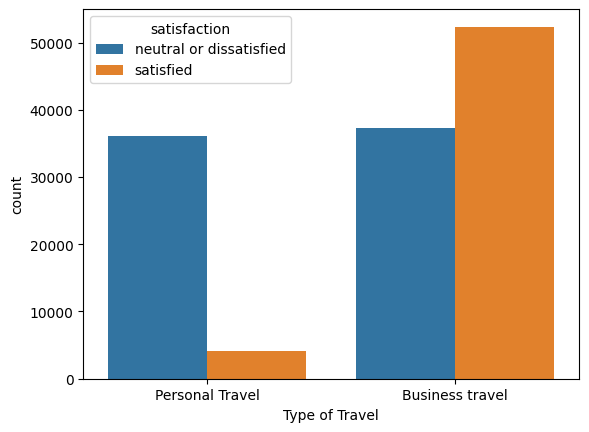

In [8]:
sns.countplot(data=df,x='Type of Travel',hue='satisfaction')
df.groupby(['Type of Travel'])[['satisfaction']].value_counts(normalize=True)

Có sự khác biệt rất đáng kể về mức độ hài lòng giữa hành khách đi công tác và hành khách đi du lịch vì mục đích giải trí. Giống như sự khác biệt về mức độ hài lòng giữa các cabin khác nhau, có một cái nhìn sâu sắc được khám phá trong sự khác biệt này.

Class     satisfaction           
Business  satisfied                  0.694434
          neutral or dissatisfied    0.305566
Eco       neutral or dissatisfied    0.812327
          satisfied                  0.187673
Eco Plus  neutral or dissatisfied    0.753586
          satisfied                  0.246414
Name: proportion, dtype: float64

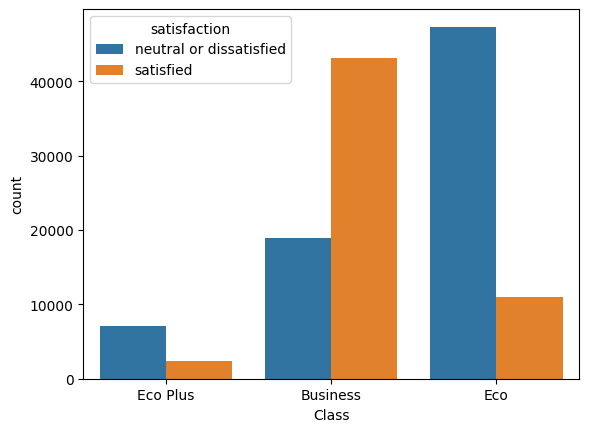

In [9]:
sns.countplot(data=df,x='Class',hue='satisfaction')
df.groupby(['Class'])[['satisfaction']].value_counts(normalize=True)

Từ phân bổ trên - chúng ta có thể nhận thấy sự khác biệt cơ bản về mức độ hài lòng giữa hành khách bay ở khoang cao cấp (hạng thương gia) so với hành khách bay ở khoang xe khách (phổ thông hoặc cao hơn). Điều này chỉ ra những hiểu biết bổ sung cần đạt được giữa các nhóm này để cuối cùng sẽ mang lại sự hài lòng cho hành khách.

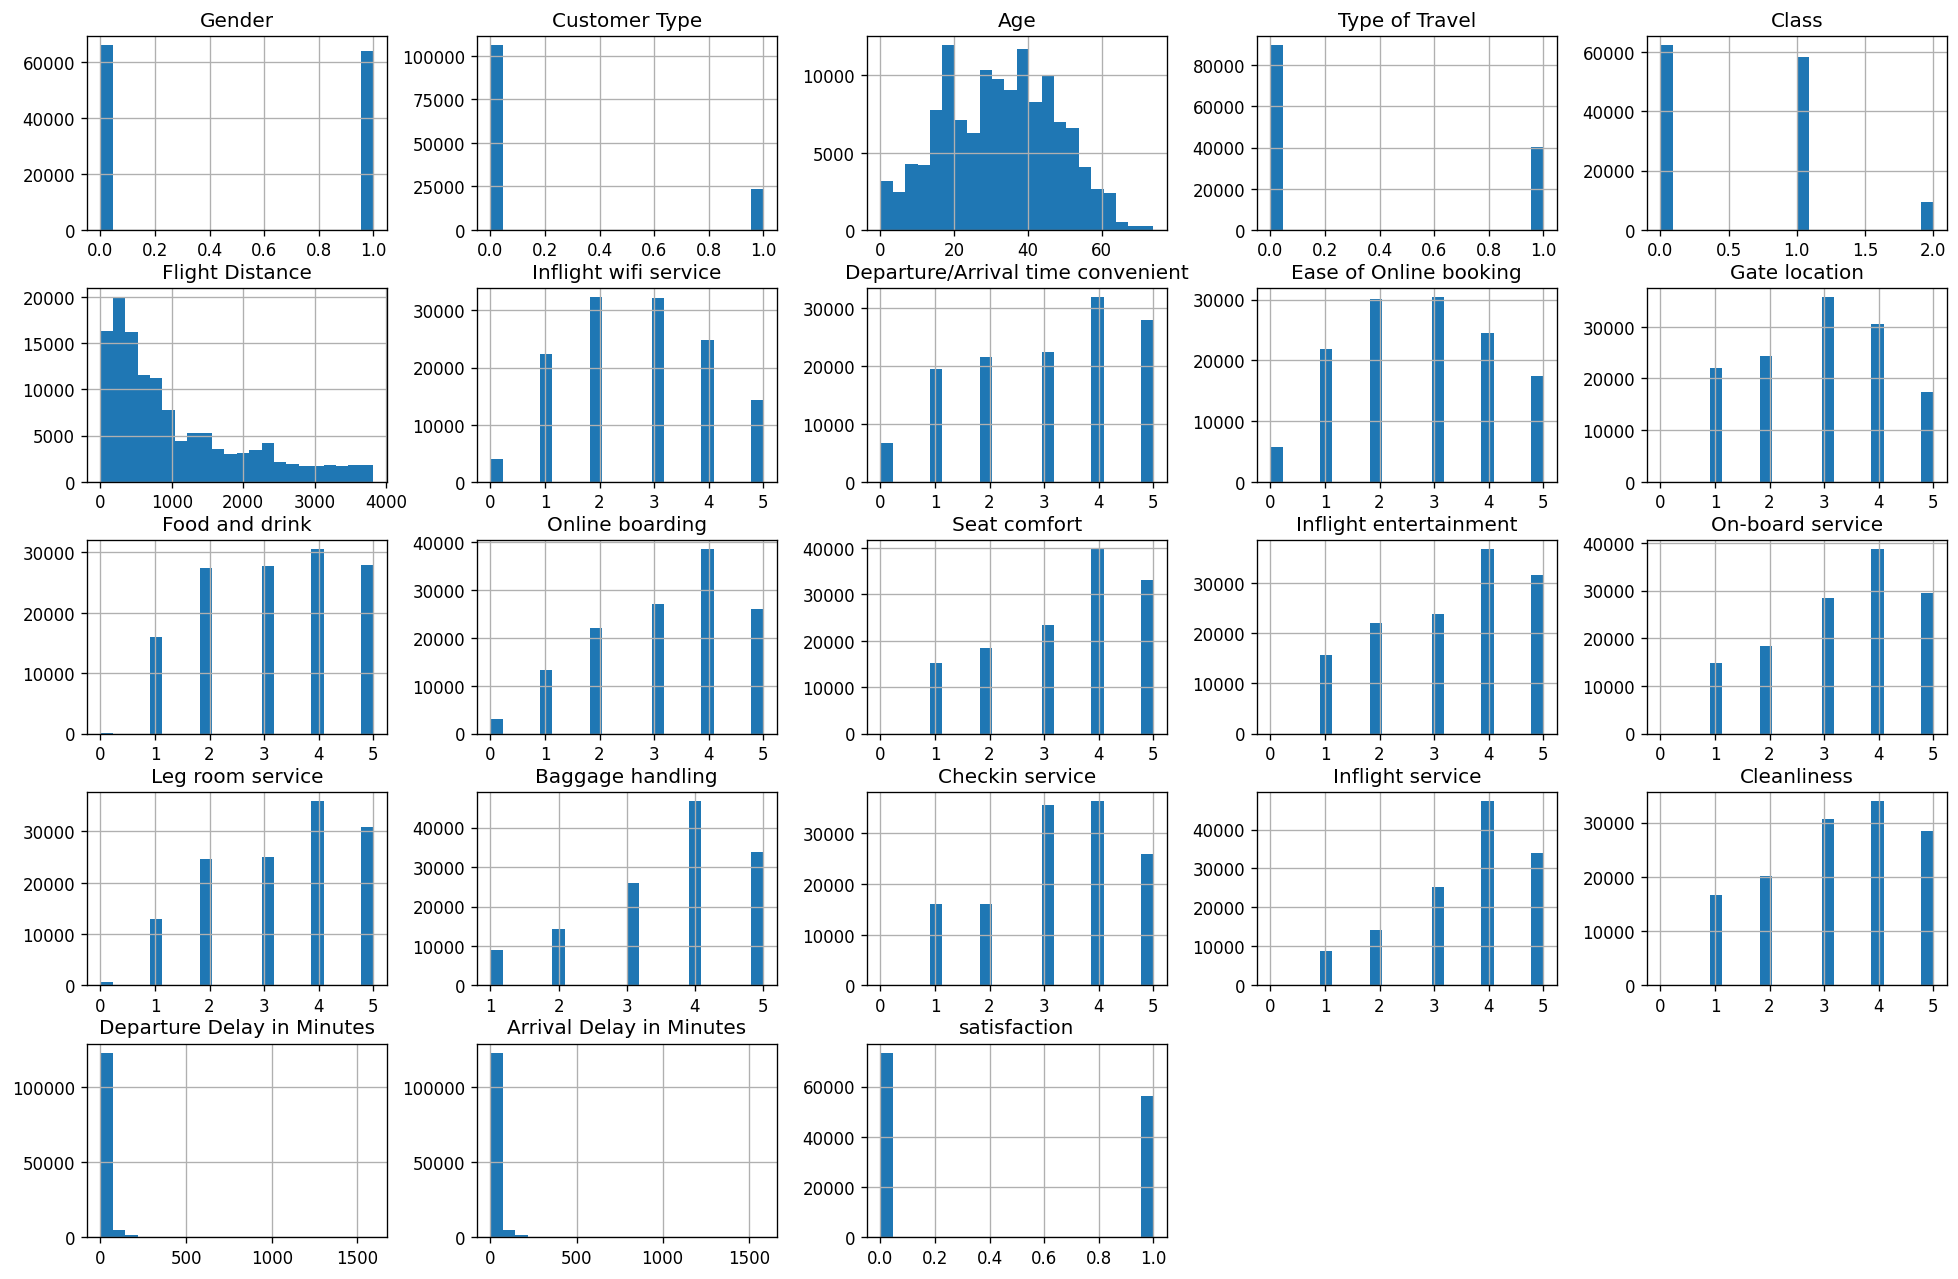

In [33]:
# df.drop(['id', 'Unnamed: 0'],axis = 1).hist(bins=22, figsize=(20, 13), grid = True)
df.hist(bins=22, figsize=(20, 13), grid = True)
plt.show()

Lưu ý: Từ Hình dung trước, tần suất hài lòng cao nhất là (4) cho tất cả ngoại trừ: [Inflight wifi service, Ease of online booking, Gate location] là(3)

In [11]:
df.drop(['Unnamed: 0', 'id'] , axis = 1 , inplace = True)
df["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns[0:6]:
    df[column] = label_encoder.fit_transform(df[column])

df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,6,1,2,359,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,18,0,0,144,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,19,0,0,1004,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,18,0,0,447,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,54,0,0,124,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,27,0,0,417,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,1,0,16,0,0,528,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,0,10,1,1,700,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,1,0,7,0,0,989,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


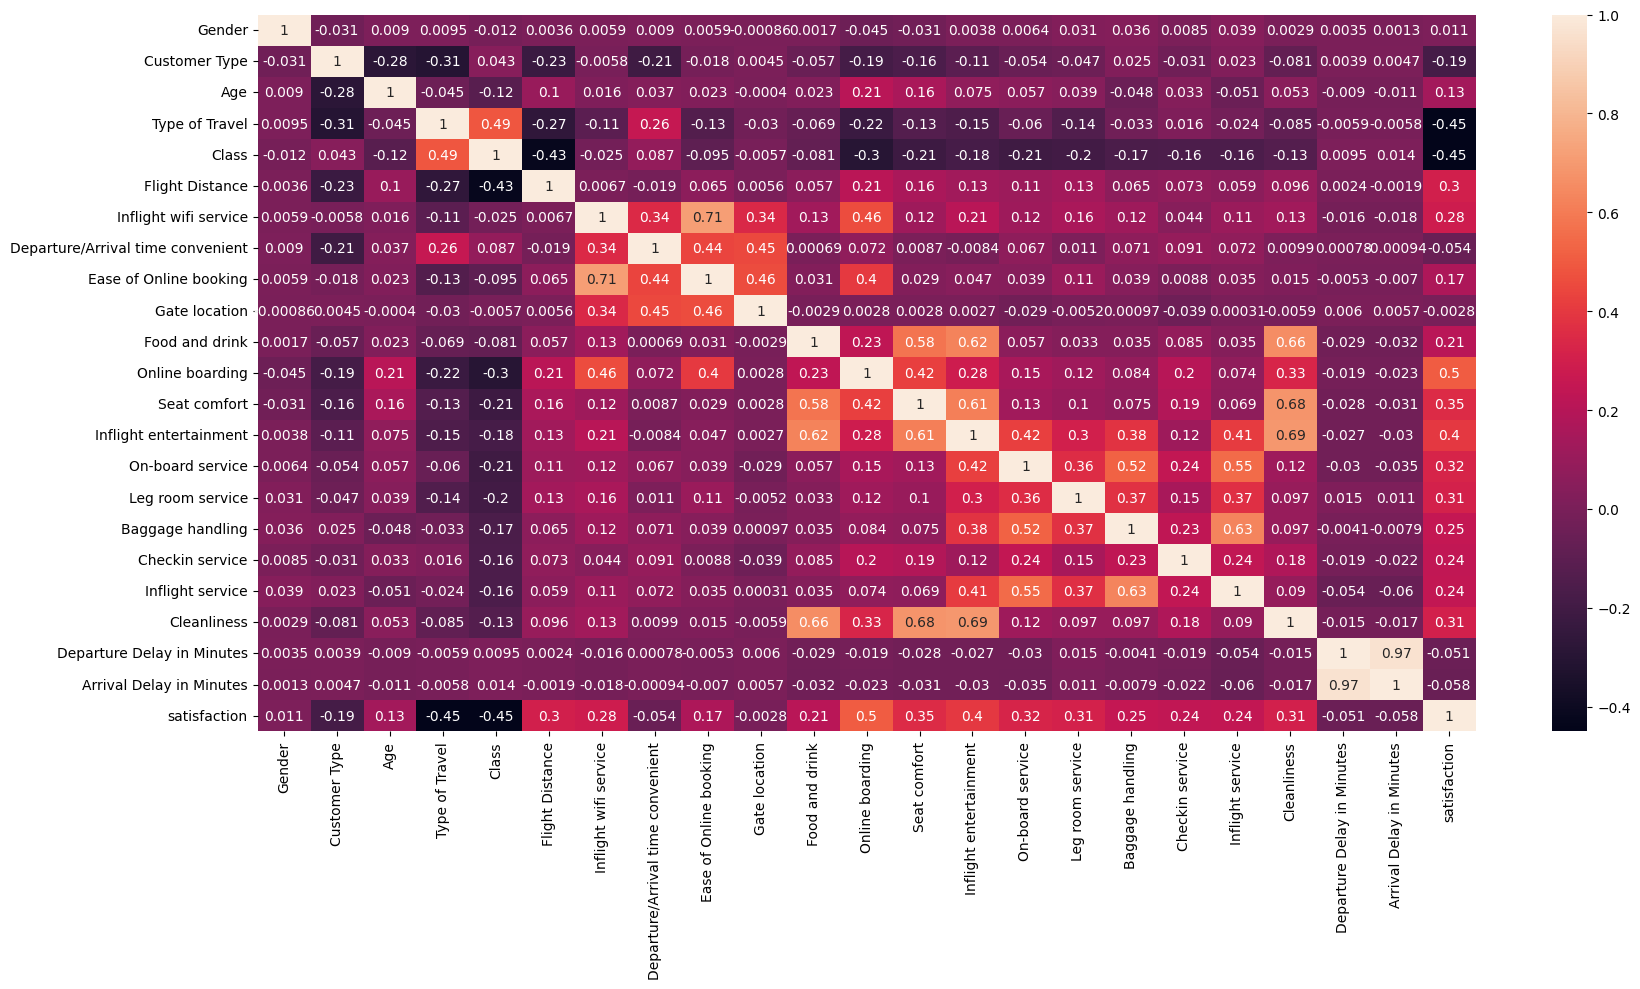

In [13]:
# Show heatmap for correlation each column
fig = plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

Nhìn vào mối tương quan giữa các tính năng nhất định cho thấy mối tương quan cao nhất là  delay in arrival  depature , điều này khá thuận tiện vì chúng ảnh hưởng lẫn nhau
sự thân thiện cũng ảnh hưởng lớn đến đồ ăn thức uống, chỗ ngồi thoải mái và mạng lưới giải trí trên chuyến bay
'Inflight wifi service' và 'Ease of online booking' có mối tương quan với nhau, điều này cho thấy cách khách hàng có nhu cầu sử dụng Internet cao

In [14]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,6,1,2,359,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,18,0,0,144,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,19,0,0,1004,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,18,0,0,447,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,54,0,0,124,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,27,0,0,417,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,1,0,16,0,0,528,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,0,10,1,1,700,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,1,0,7,0,0,989,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


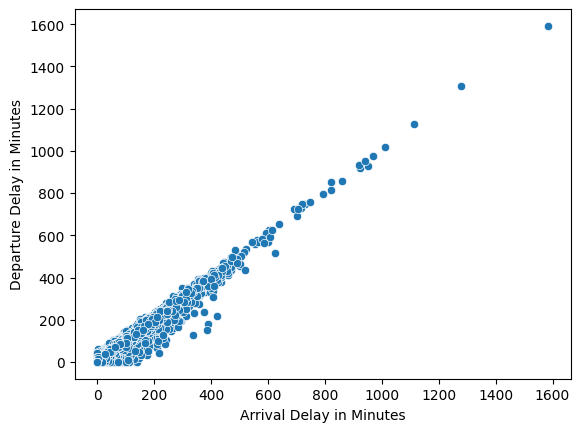

In [15]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

sns.scatterplot(x ='Arrival Delay in Minutes' , y = 'Departure Delay in Minutes' , data = df )
plt.show()

 Từ biểu đồ này có mối tương quan chặt chẽ giữa: (Độ trễ đến tính bằng phút) và (Độ trễ khởi hành tính bằng phút), Chúng ta cũng có thể nhận thấy rằng 'Departure Delay' xấp xỉ bằng 'Arrival Delay'. Điều đó cho chúng ta biết rằng sự chậm trễ chỉ xảy ra trước khi chuyến bay bắt đầu không phải trong chuyến bay.

In [16]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'])

In [17]:
chosen_feature_cols = df.drop(columns= 'satisfaction')
target_col = df['satisfaction']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(chosen_feature_cols, target_col, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# *Modeling*  

In [40]:
model_L = LogisticRegression()

# Huấn luyện mô hình
model_L.fit(X_train_scaled, y_train)

LogisticRegression()

In [42]:
y_pred_L = model_L.predict(X_test)
y_pred_L

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 1, ..., 0, 0, 1])

Accuracy:  0.6060466071245252
Precision:  0.5351961079777845
Recall:  0.7318810715337062
F1:  0.618273152292848

Classification Report

              precision    recall  f1-score   support

           0       0.71      0.51      0.59     21979
           1       0.54      0.73      0.62     16985

    accuracy                           0.61     38964
   macro avg       0.62      0.62      0.61     38964
weighted avg       0.63      0.61      0.60     38964



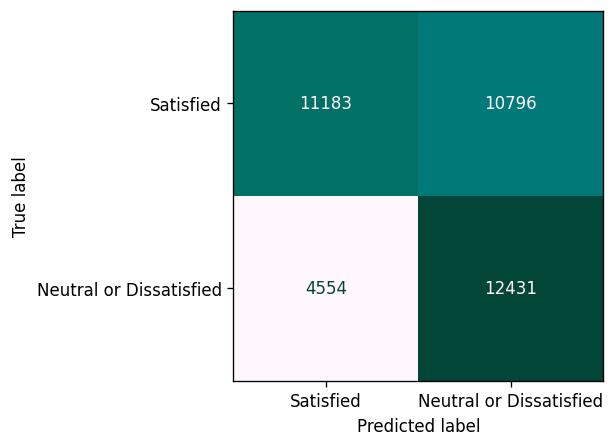

In [43]:
def print_evaluation_scores(y_true, y_pred):
    print("Accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred_L))
    print("Precision: ", precision_score(y_true=y_true, y_pred=y_pred_L))
    print("Recall: ", recall_score(y_true=y_true, y_pred=y_pred_L))
    print("F1: ", f1_score(y_true=y_true, y_pred=y_pred_L))
    print("\nClassification Report\n")
    print(classification_report(y_true=y_true, y_pred=y_pred_L))

    cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_L)

    fig, ax = plt.subplots(figsize=(4, 4))
    labels = ['Satisfied', 'Neutral or Dissatisfied']
    ConfusionMatrixDisplay.from_predictions(
        y_true=y_test,
        y_pred=y_pred_L,
        display_labels=labels,
        xticks_rotation=0,
        ax=ax,
        colorbar=False,
        cmap="PuBuGn",
    )


print_evaluation_scores(y_true=y_test, y_pred=y_pred_L)

# *DecisionTree*

In [20]:
score_total = []
max_depths = list(range(1, 20))

for i in max_depths:
    model_tree = DecisionTreeClassifier(max_depth=i)
    model_tree.fit(X=X_train_scaled, y=y_train)
    y_pred = model_tree.predict(X=X_test_scaled)
    score_total.append(f1_score(y_true=y_test, y_pred=y_pred))

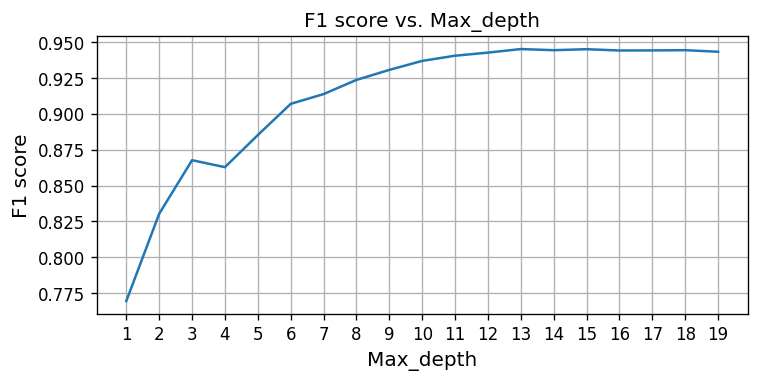

In [21]:
plt.rcParams.update({"figure.figsize": (7, 3), "figure.dpi": 120})
plt.plot(max_depths, score_total)

plt.title("F1 score vs. Max_depth")
plt.ylabel("F1 score", fontsize=12)
plt.xlabel("Max_depth", fontsize=12)
plt.xticks(max_depths)
plt.grid("minor")

In [38]:
model_tree = DecisionTreeClassifier(max_depth=13)
model_tree.fit(X_train_scaled, y_train)

y_pred=model_tree.predict(X_test_scaled)

Accuracy:  0.953264551894056
Precision:  0.9622606999146446
Recall:  0.9292316750073595
F1:  0.9454578129211969

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21979
           1       0.96      0.93      0.95     16985

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



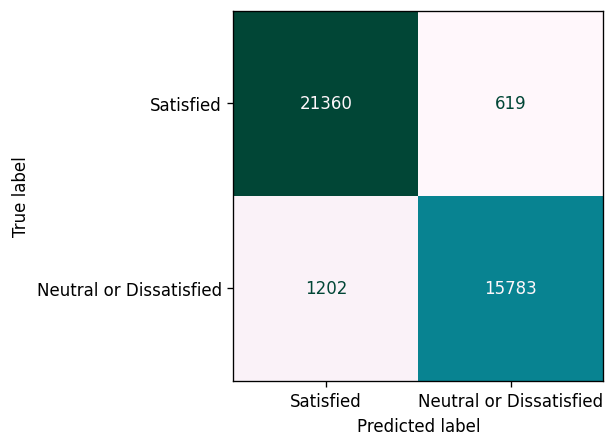

In [39]:
def print_evaluation_scores(y_true, y_pred):
    print("Accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))
    print("Precision: ", precision_score(y_true=y_true, y_pred=y_pred))
    print("Recall: ", recall_score(y_true=y_true, y_pred=y_pred))
    print("F1: ", f1_score(y_true=y_true, y_pred=y_pred))
    print("\nClassification Report\n")
    print(classification_report(y_true=y_true, y_pred=y_pred))

    cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    labels = ['Satisfied', 'Neutral or Dissatisfied']
    ConfusionMatrixDisplay.from_predictions(
        y_true=y_test,
        y_pred=y_pred,
        display_labels=labels,
        xticks_rotation=0,
        ax=ax,
        colorbar=False,
        cmap="PuBuGn",
    )


print_evaluation_scores(y_true=y_test, y_pred=y_pred)

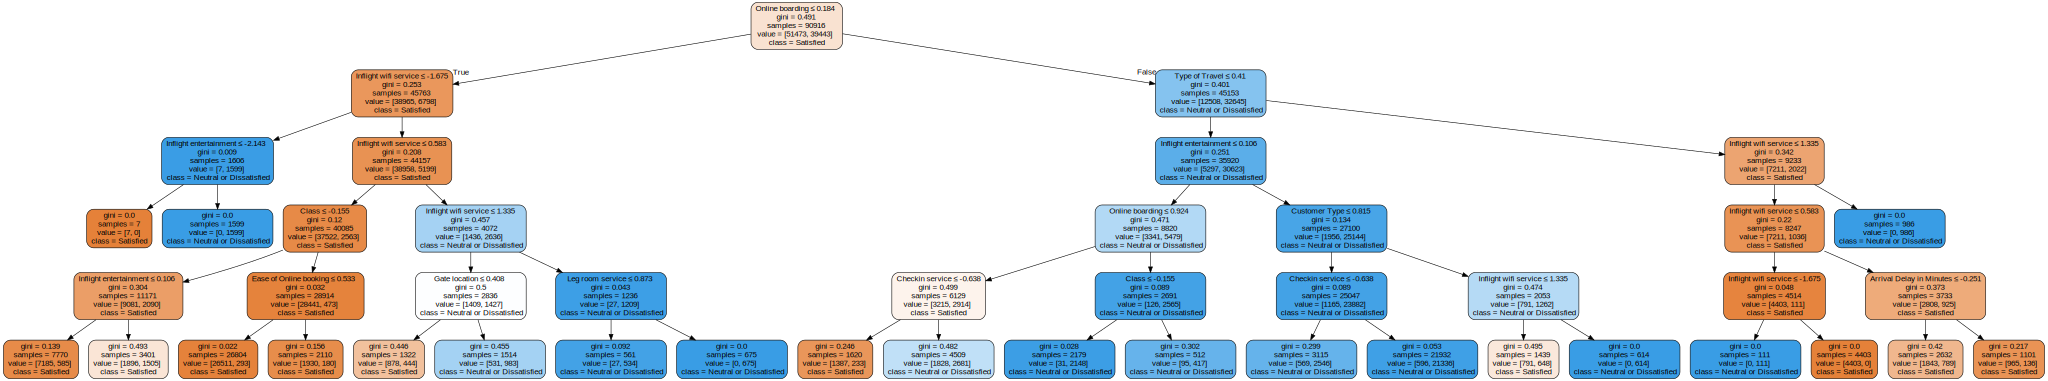

In [24]:
import graphviz
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X=X_train_scaled, y=y_train)


dot_data = tree.export_graphviz(
    decision_tree=dt,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['Satisfied', 'Neutral or Dissatisfied'],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

# *RandomForestClassifier*

In [25]:
score_total = []
n_estimators = list(range(1, 31))

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X=X_train_scaled, y=y_train)
    y_pred = rf.predict(X=X_test_scaled)
    score_total.append(f1_score(y_true=y_test, y_pred=y_pred))

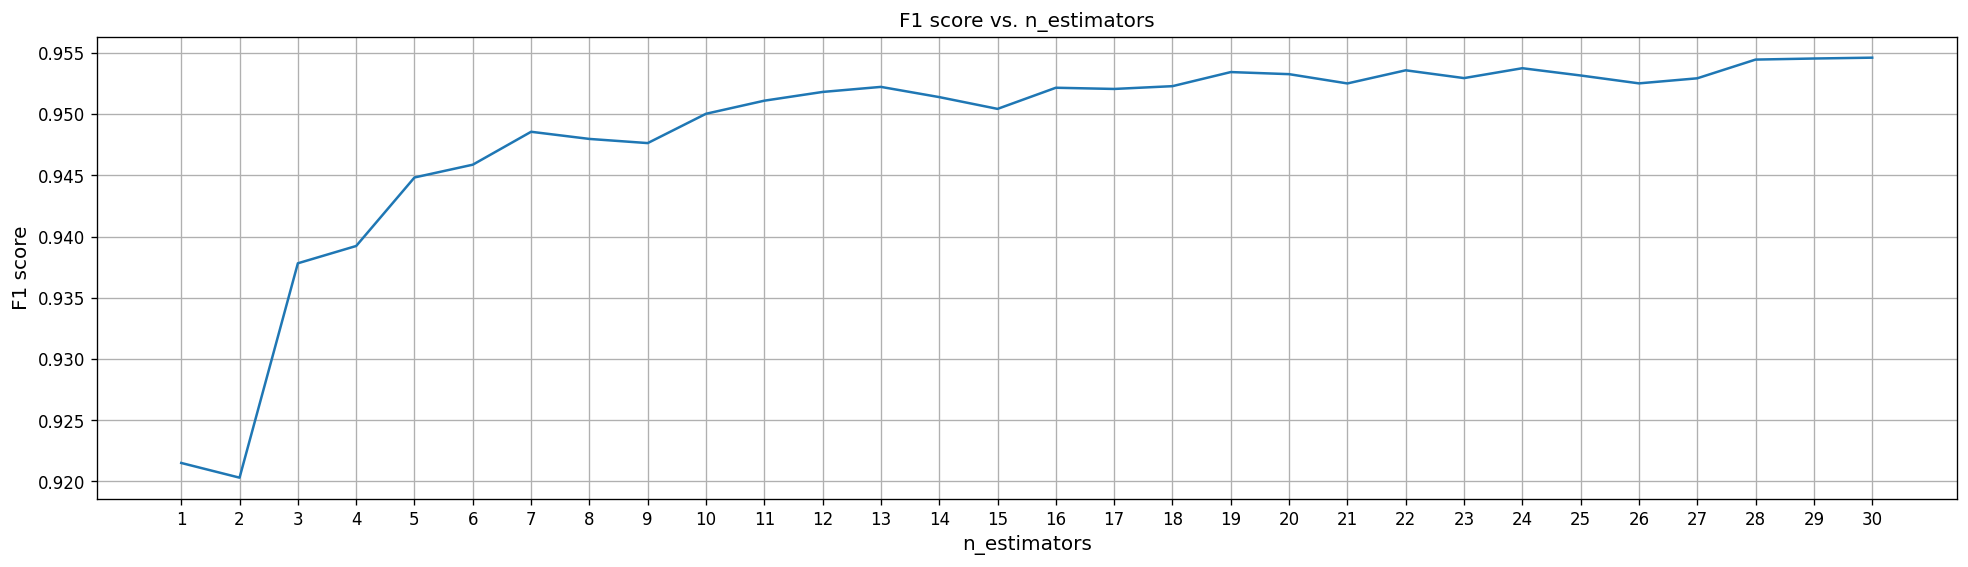

In [26]:
plt.rcParams.update({"figure.figsize": (20, 5), "figure.dpi": 120})
plt.plot(n_estimators, score_total)

plt.title("F1 score vs. n_estimators")
plt.ylabel("F1 score", fontsize=12)
plt.xlabel("n_estimators", fontsize=12)
plt.xticks(n_estimators)
plt.grid("minor")

In [27]:
# Grid Search
grid_space = {'max_depth': [3,5,10,15],
              'n_estimators': range(15,31),
              'criterion':['gini','entropy']
              }
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train_scaled, y_train)

In [28]:
# Random Forest accuracy
y_pred_rf = rf_grid.predict(X_test_scaled)

# Accuracy
print ('Accuracy: ', accuracy_score(y_pred_rf, y_test))

# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Accuracy:  0.9579355302330356
Best hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}
Best score: 0.9583681664189407


In [29]:
rf = RandomForestClassifier(n_estimators=24, max_depth=15)
rf.fit(X_train_scaled, y_train)
y_pred=rf.predict(X_test_scaled)

Accuracy:  0.9568062827225131
Precision:  0.9631916696936675
Recall:  0.9367088607594937
F1:  0.9497656926245411

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     21979
           1       0.96      0.94      0.95     16985

    accuracy                           0.96     38964
   macro avg       0.96      0.95      0.96     38964
weighted avg       0.96      0.96      0.96     38964



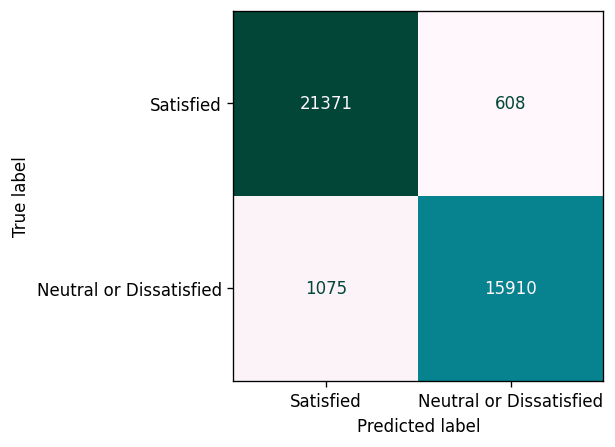

In [30]:
def print_evaluation_scores(y_true, y_pred):
    print("Accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))
    print("Precision: ", precision_score(y_true=y_true, y_pred=y_pred))
    print("Recall: ", recall_score(y_true=y_true, y_pred=y_pred))
    print("F1: ", f1_score(y_true=y_true, y_pred=y_pred))
    print("\nClassification Report\n")
    print(classification_report(y_true=y_true, y_pred=y_pred))

    cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    labels = ['Satisfied', 'Neutral or Dissatisfied']
    ConfusionMatrixDisplay.from_predictions(
        y_true=y_test,
        y_pred=y_pred,
        display_labels=labels,
        xticks_rotation=0,
        ax=ax,
        colorbar=False,
        cmap="PuBuGn",
    )


print_evaluation_scores(y_true=y_test, y_pred=y_pred)

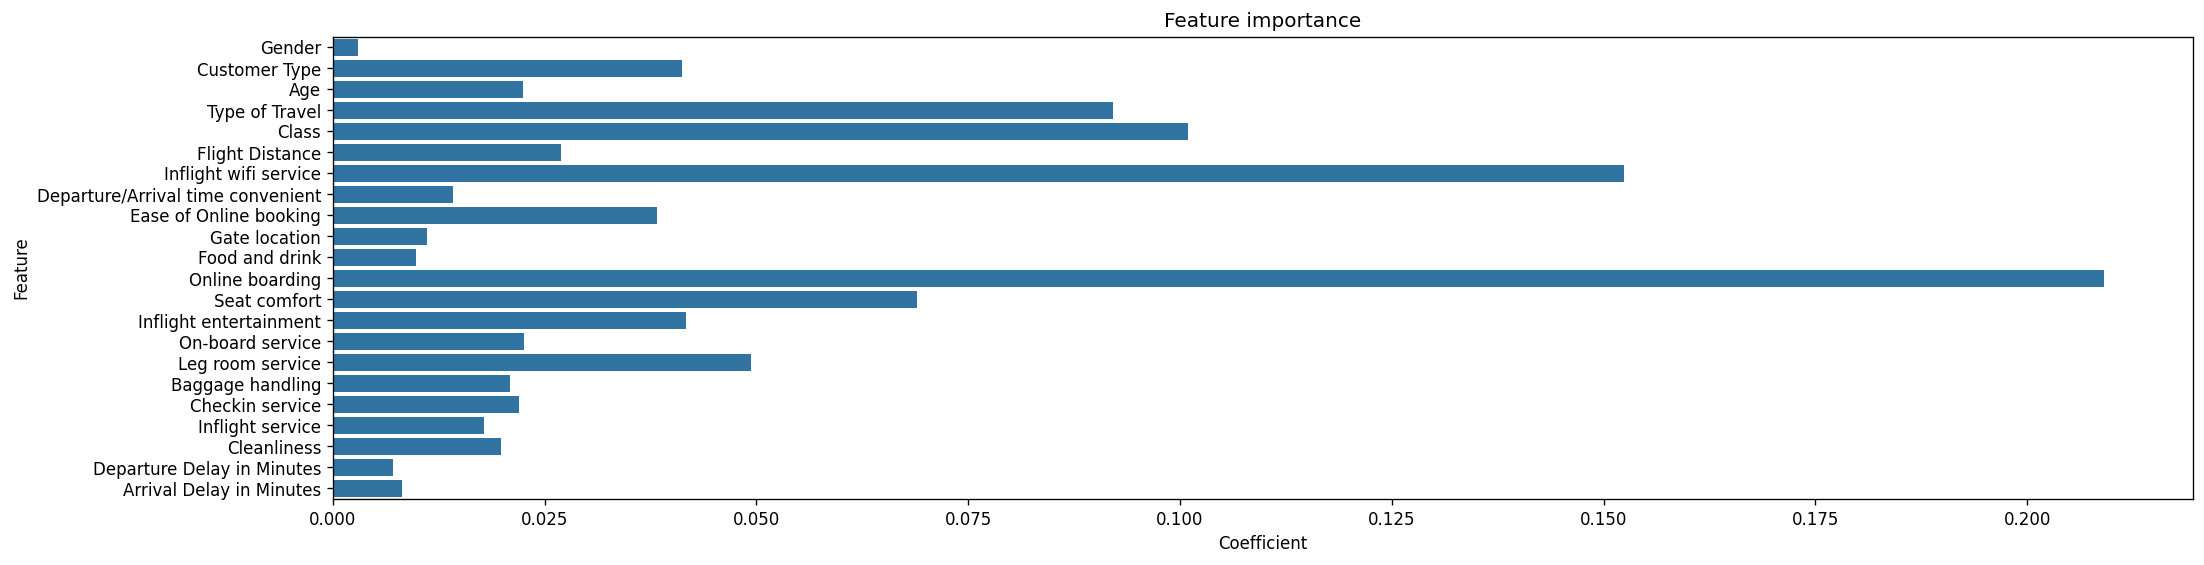

In [31]:
importances = rf.feature_importances_
forest_importances = pd.DataFrame(data={'Feature': chosen_feature_cols.columns, 'Coefficient': importances})

sns.barplot(data = forest_importances, y= 'Feature', x='Coefficient', orient='h')
plt.title('Feature importance')
plt.show()

1. Các feature có sức ảnh hưởng lớn đến sự hài lòng của khách hàng có thể thấy trong biểu đồ trên là 'Online boarding', 'Inflight wifi service', 'Type of Travel', và 'Class'
2. Nhận thấy rằng các dịch vụ như Wi-Fi trên máy bay và online boarding cũng là những yếu tố chính dự báo mức độ hài lòng của khách hàng. Khuyến nghị hãng hàng không cải thiện các dịch vụ trực tuyến và Wi-Fi trên chuyến bay để cải thiện sự hài lòng của khách hàng.

   - Cải thiện trang web và ứng dụng di động: Trang web và ứng dụng di động của hãng hàng không được thiết kế tốt và dễ sử dụng. Cung cấp trải nghiệm mượt mà và thuận tiện từ việc tìm kiếm chuyến bay, đặt vé, đến việc thực hiện check-in trực tuyến và quản lý thông tin chuyến đi.

   - Cung cấp dịch vụ chọn chỗ ngồi tiện lợi

   - Tích hợp các dịch vụ thêm: Cho phép hành khách đặt các dịch vụ bổ sung như đặt vé phòng chờ, mua thức ăn và thức uống trước khi bay, thuê xe hoặc đặt tour du lịch trực tuyến thông qua website

3. Ngoài ra, các dịch vụ riêng lẻ như giải trí trên chuyến bay, dịch vụ trên chuyến bay và sự thoải mái của ghế là một số yếu tố dự báo ảnh hưởng không nhỏ về mức độ hài lòng chung của khách hàng. Tuy nhiên, các dịch vụ như giải trí trên chuyến bay và sự thoải mái của ghế ngồi có thể khó cải thiện hoặc tốn kém để tạo ra tác động đáng kể ngay lập tức. Do đó, cần khảo sát thêm về những gì khách hàng đánh giá cao về trải nghiệm trên chuyến bay để hãng hàng không có thể cung cấp dịch vụ tốt hơn cho phù hợp, vì giải trí trên chuyến bay tốt hơn sẽ thúc đẩy sự hài lòng cao hơn mà không cần đầu tư vào cơ sở hạ tầng.